# Chest Xray

## Importation des librairies

In [23]:
import tensorflow as tf
import os, shutil
from keras.layers import Input, Flatten, Dense
from keras.layers import Convolution2D as Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.models import Sequential, Model
from keras.optimizers import Adam, RMSprop
from keras.utils import to_categorical
from keras.datasets import cifar10, mnist
import numpy as np 
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

## Importation des données

### Version Google Collab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from zipfile import ZipFile

test_file_name = "/content/drive/MyDrive/IMT/M1/MDATA/Chest/chest_xray.zip"

with ZipFile(test_file_name, 'r') as zip:
    zip.printdir()
    zip.extractall('chest_xray') 

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
chest_xray/train/PNEUMONIA/person413_bacteria_1829.jpeg 2019-09-28 16:38:14        78827
__MACOSX/chest_xray/train/PNEUMONIA/._person413_bacteria_1829.jpeg 2019-09-28 16:38:14          212
chest_xray/train/PNEUMONIA/person1502_virus_2612.jpeg 2019-09-28 16:38:02       170200
__MACOSX/chest_xray/train/PNEUMONIA/._person1502_virus_2612.jpeg 2019-09-28 16:38:02          212
chest_xray/train/PNEUMONIA/person1400_bacteria_3554.jpeg 2019-09-28 16:38:00       117114
__MACOSX/chest_xray/train/PNEUMONIA/._person1400_bacteria_3554.jpeg 2019-09-28 16:38:00          212
chest_xray/train/PNEUMONIA/person383_bacteria_1754.jpeg 2019-09-28 16:38:14        89776
__MACOSX/chest_xray/train/PNEUMONIA/._person383_bacteria_1754.jpeg 2019-09-28 16:38:14          212
chest_xray/train/PNEUMONIA/person605_virus_1166.jpeg 2019-09-28 16:38:20       128772
__MACOSX/chest_xray/train/PNEUMONIA/._person605_virus_1166.jpeg 2019-09-28 16:38:2

### Version Local

In [2]:
base_dir = '/Users/Ombeline/Documents/IMT/M1/5 - MDATA/Projet Chest/chest_xray'

train_dir = '/Users/Ombeline/Documents/IMT/M1/5 - MDATA/Projet Chest/chest_xray/train'
train_normal_dir = '/Users/Ombeline/Documents/IMT/M1/5 - MDATA/Projet Chest/chest_xray/train/normal'
train_pneumonia_dir = '/Users/Ombeline/Documents/IMT/M1/5 - MDATA/Projet Chest/chest_xray/train/pneumonia'

validation_dir = '/Users/Ombeline/Documents/IMT/M1/5 - MDATA/Projet Chest/chest_xray/val'
validation_normal_dir = '/Users/Ombeline/Documents/IMT/M1/5 - MDATA/Projet Chest/chest_xray/val/normal'
validation_pneumonia_dir = '/Users/Ombeline/Documents/IMT/M1/5 - MDATA/Projet Chest/chest_xray/val/pneumonia'

test_dir = '/Users/Ombeline/Documents/IMT/M1/5 - MDATA/Projet Chest/chest_xray/test'
test_normal_dir = '/Users/Ombeline/Documents/IMT/M1/5 - MDATA/Projet Chest/chest_xray/test/normal'
test_pneumonia_dir = '/Users/Ombeline/Documents/IMT/M1/5 - MDATA/Projet Chest/chest_xray/test/pneumonia'

## Exploration des données 

In [3]:
print('total training normal images:', len(os.listdir(train_normal_dir)))
print('total training pneumonia images:', len(os.listdir(train_pneumonia_dir)))
print('total validation normal images:', len(os.listdir(validation_normal_dir)))
print('total validation pneumonia images:', len(os.listdir(validation_pneumonia_dir)))
print('total test normal images:', len(os.listdir(test_normal_dir)))
print('total test pneumonia images:', len(os.listdir(test_pneumonia_dir)))

total training normal images: 1342
total training pneumonia images: 3876
total validation normal images: 9
total validation pneumonia images: 9
total test normal images: 234
total test pneumonia images: 390


# Essai 1 : CNN simple

## Pré-traitement des données

In [10]:
# Redimensionne les images en x 1/255
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(64, 64), 
        batch_size=64, 
        class_mode='binary'  
)

validation_generator = test_datagen.flow_from_directory(
        validation_dir, 
        target_size=(64, 64), 
        batch_size=64, 
        class_mode='binary') 

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [11]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (64, 64, 64, 3)
labels batch shape: (64,)


## Construction du réseau de neurones 

Question 2 : Comme proposé dans l'énoncé, on peut mettre en place le réseau de neurones suivant : 

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Question 1 : On peut alors calculer la taille des différentes images de sortie ainsi que le nombre de poids, on a donc : 

CONV-3-32 : 62 x 62 x 32, poids : 3 x 3 x 3 x 32 + 32 = 896

POOL-2 : 31 x 31 x 32, poids : 0

CONV-3-32 : 29 x 29 x 32, poids : 3 x 3 x 32 x 32 + 32 = 9,248

POOL-2 : 14 x 14 x 32, poids : 0

CONV-3-32 : 12 x 12 x 32, poids : 3 x 3 x 32 x 32 + 32 = 9,248

POOL-2 : 6 x 6 x 32, poids : 0

FC-128 : 128, poids : 6 x 6 x 32 x 128 + 128 = 295,040

FC-1 : 1, poids : 128 + 1 = 129




Pour une meilleure performance, on propose d'utiliser le réseau de neurones suivant : 

In [16]:
model = Sequential ()
model.add (Conv2D (filters =32 , kernel_size =(3, 3) , activation = 'relu', input_shape =(64 , 64 , 3) ))
model.add (MaxPooling2D ((2 , 2) ))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add (Flatten () )
model.add (Dense (units =512 , activation = 'relu'))
model.add (Dense (units =1 , activation = 'sigmoid'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 6, 6, 128)       

Question 3 : Pour ce problème à 2 classes, on décide de choisir la fonction de coût : binary-crossentropy

In [18]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=2e-5), metrics=['accuracy'])

## Définition du modèle d'apprentissage

In [19]:
history = model.fit(
      train_generator,
      steps_per_epoch=82,
      epochs=60,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/60
82/82 [==============================] - ETA: 0s - loss: 0.6032 - accuracy: 0.7387

82/82 [==============================] - 66s 800ms/step - loss: 0.6032 - accuracy: 0.7387 - val_loss: 0.8173 - val_accuracy: 0.5000
Epoch 2/60
82/82 [==============================] - 61s 743ms/step - loss: 0.5645 - accuracy: 0.7429
Epoch 3/60
82/82 [==============================] - 57s 695ms/step - loss: 0.5432 - accuracy: 0.7429
Epoch 4/60
82/82 [==============================] - 56s 688ms/step - loss: 0.5101 - accuracy: 0.7429
Epoch 5/60
82/82 [==============================] - 56s 687ms/step - loss: 0.4643 - accuracy: 0.7498
Epoch 6/60
82/82 [==============================] - 56s 688ms/step - loss: 0.4095 - accuracy: 0.7977
Epoch 7/60
82/82 [==============================] - 58s 704ms/step - loss: 0.3560 - accuracy: 0.8491
Epoch 8/60
82/82 [==============================] - 60s 734ms/step - loss: 0.3134 - accuracy: 0.8710
Epoch 9/60
82/82 [==============================] - 59s 720ms/step - loss: 0.2868 - accuracy: 0.8821
Epoch 10/60
82/82 [==============================] - 61s 742

In [20]:
model.save('chest_xray_small_1_v2.h5')

## Visualisation de l'évolution de l'apprentissage

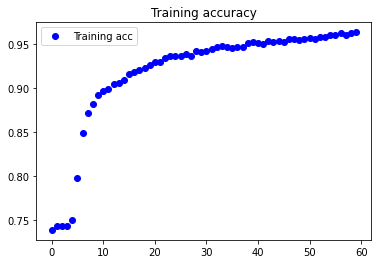

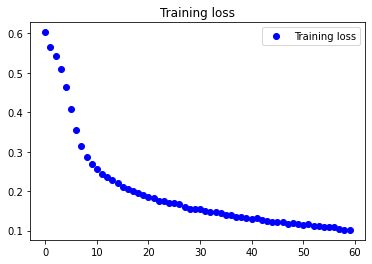

In [21]:
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
#plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training loss')
plt.legend()

plt.show()

## Classification sur le set Test

In [29]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(64, 64),
        batch_size=16,
        class_mode='binary',
        shuffle='False')

test_loss, test_acc = model.evaluate(test_generator, steps=39)
print('Accuracy score du jeu de données test : {:.2f}%'.format(test_acc*100))

Found 624 images belonging to 2 classes.
39/39 [==============================] - 7s 176ms/step - loss: 0.6076 - accuracy: 0.7853
Accuracy score du jeu de données test : 78.53%


Question 4 : On se rend compte qu'on ne dispose pas d'une taille suffisante de données. Pour surmonter ce manque de données, on peut utiliser plusieurs techniques d'augmentation des données telles que : 

- Rotation aléatoire

- Changement de taille aléatoire

- Transposition aléatoire

- Zoom aléatoire

- Changement de luminosité aléatoire




# Essai 2 : Utilisation de l'augmentation des données 

On décide de faire de l'augmentation des données : consiste à générer davantage de données d'apprentissage à partir d'échantillons de données d'apprentissage existantes, en "augmentant" les échantillons par un certain nombre de transformations aléatoires qui donnent des images d'apparence crédible. L'objectif est qu'au moment de l'apprentissage, notre modèle ne voit jamais deux fois exactement la même image.

## Pré-traitement des données

In [34]:
train_datagen = ImageDataGenerator(
      rescale=1.0/255,
      rotation_range=40, # valeur en degrés (0-180), plage à l'intérieur de laquelle on peut faire tourner les images de maniere random
      width_shift_range=0.2, # plage (en fraction de la largeur) à l'intérieur de laquelle il est possible de déplacer aléatoirement des images horizontalement.
      height_shift_range=0.2, # plage (en fraction de la hauteur) à l'intérieur de laquelle il est possible de déplacer aléatoirement des images verticalement.
      shear_range=0.2, # plage permettant d'appliquer de manière aléatoire des transformations de cisaillement
      zoom_range=0.2, # zoomer de manière aléatoire à l'intérieur des images
      horizontal_flip=True, # retourner de manière aléatoire la moitié des images horizontalement -- pertinent lorsqu'il n'y a pas d'hypothèse d'asymétrie horizontale
      fill_mode='nearest') # stratégie utilisée pour remplir les pixels nouvellement créés

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(64, 64), 
        batch_size=64,
        class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
        validation_dir, 
        target_size=(64, 64), 
        batch_size=64, 
        class_mode='binary') 

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


Question 5 : Le code précédent permet de créer deux objets ImageDataGenerator, qui permettent de générer des lots d'images en temps réel lors de l'entraînement et de la validation du modèle. Le rescaling normalise les pixels de chaque image. Le shear_range et le zoom_range permettent de déformer aléatoirement les images. Le horizontal_flip permet de retourner aléatoirement les images horizontalement. La fonction flow_from_directory permet de lire les images depuis le répertoire spécifié, de les redimensionner et de les diviser en lots.

## Construction du réseau de neurones

In [ ]:
model = Sequential ()
model.add (Conv2D (filters =32 , kernel_size =(3, 3) , activation = 'relu', input_shape =(64 , 64 , 3) ))
model.add (MaxPooling2D ((2 , 2) ))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add (Flatten () )
model.add (Dense (units =512 , activation = 'relu'))
model.add (Dense (units =1 , activation = 'sigmoid'))

In [35]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=2e-5), metrics=['accuracy'])

## Définition du modèle d'apprentissage

In [36]:
history = model.fit(
      train_generator, # générateur Python qui produira des lots d'entrées et de cibles indéfiniment
      steps_per_epoch=82, # nb d'échantillons par lot qu'on tire du générateur avant de déclarer une itération terminée
      epochs=50, # 100 lots de 20 pour atteindre notre objectif de 2000 échantillons
      validation_data=validation_generator, # générateur qui produra des lots de données de validation à l'infini
      validation_steps=50) # 50 lots de 20 pour atteindre notre objectif de 1000 échantillons

Epoch 1/50
82/82 [==============================] - ETA: 0s - loss: 0.3675 - accuracy: 0.8382

82/82 [==============================] - 67s 797ms/step - loss: 0.3675 - accuracy: 0.8382 - val_loss: 0.3909 - val_accuracy: 0.8125
Epoch 2/50
82/82 [==============================] - 65s 789ms/step - loss: 0.3421 - accuracy: 0.8491
Epoch 3/50
82/82 [==============================] - 62s 758ms/step - loss: 0.3407 - accuracy: 0.8485
Epoch 4/50
82/82 [==============================] - 63s 769ms/step - loss: 0.3130 - accuracy: 0.8633
Epoch 5/50
82/82 [==============================] - 63s 758ms/step - loss: 0.3231 - accuracy: 0.8530
Epoch 6/50
82/82 [==============================] - 63s 775ms/step - loss: 0.3051 - accuracy: 0.8673
Epoch 7/50
82/82 [==============================] - 63s 768ms/step - loss: 0.3092 - accuracy: 0.8645
Epoch 8/50
82/82 [==============================] - 65s 794ms/step - loss: 0.3022 - accuracy: 0.8620
Epoch 9/50
82/82 [==============================] - 63s 758ms/step - loss: 0.2986 - accuracy: 0.8721
Epoch 10/50
82/82 [==============================] - 62s 763

In [37]:
model.save('chest_xray_small_2_v2.h5')

## Visualisation de l'évolution de l'apprentissage

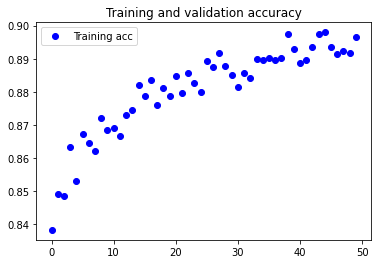

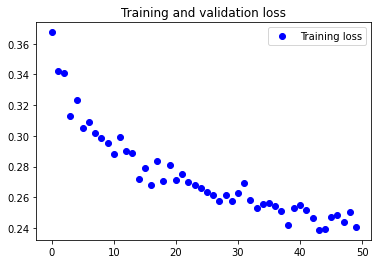

In [38]:
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
#plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Classification sur le set Test

In [39]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(64, 64),
        batch_size=16,
        class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=39)
print('Accuracy score du jeu de données test : {:.2f}%'.format(test_acc*100))

Found 624 images belonging to 2 classes.
39/39 [==============================] - 6s 156ms/step - loss: 0.3653 - accuracy: 0.8221
Accuracy score du jeu de données test : 82.21%


# Essai 3 : Utilisation de VGG avec augmentation des données

In [4]:
from keras.applications import VGG16
from keras.optimizers import RMSprop

## Pré-traitement des données 

In [5]:
train_datagen = ImageDataGenerator(
      rescale=1.0/255,
      rotation_range=40, # valeur en degrés (0-180), plage à l'intérieur de laquelle on peut faire tourner les images de maniere random
      width_shift_range=0.2, # plage (en fraction de la largeur) à l'intérieur de laquelle il est possible de déplacer aléatoirement des images horizontalement.
      height_shift_range=0.2, # plage (en fraction de la hauteur) à l'intérieur de laquelle il est possible de déplacer aléatoirement des images verticalement.
      shear_range=0.2, # plage permettant d'appliquer de manière aléatoire des transformations de cisaillement
      zoom_range=0.2, # zoomer de manière aléatoire à l'intérieur des images
      horizontal_flip=True, # retourner de manière aléatoire la moitié des images horizontalement -- pertinent lorsqu'il n'y a pas d'hypothèse d'asymétrie horizontale
      fill_mode='nearest') # stratégie utilisée pour remplir les pixels nouvellement créés

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(64, 64), 
        batch_size=64, 
        class_mode='binary' 
)

validation_generator = test_datagen.flow_from_directory(
        validation_dir, 
        target_size=(64, 64), 
        batch_size=64, 
        class_mode='binary') 

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


## Création du modèle de réseau 

In [6]:
conv_base = VGG16(weights='imagenet', # point de contrôle des poids à partir duquel le modèle doit être initialisé
                  include_top=False, # l'inclusion ou non du classificateur densément connecté au sommet du réseau
                  # Puisque nous avons l'intention d'utiliser notre propre classificateur à connexion dense (avec seulement deux classes, chat et chien), nous n'avons pas besoin de l'inclure.
                  input_shape=(64, 64, 3))

2023-03-09 19:07:31.238941: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 15,239,489
Trainable params: 15,239,489
Non-trainable params: 0
_________________________________________________________________


In [9]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [10]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=2e-5), metrics=['accuracy'])

## Définition du modèle d'apprentissage

In [11]:
history = model.fit(
      train_generator,
      steps_per_epoch=82,
      epochs=25,
      validation_data=validation_generator,
      validation_steps=82)

Epoch 1/25
82/82 [==============================] - 211s 3s/step - loss: 0.2912 - accuracy: 0.8681 - val_loss: 0.4469 - val_accuracy: 0.8750
Epoch 2/25
82/82 [==============================] - 213s 3s/step - loss: 0.1888 - accuracy: 0.9262
Epoch 3/25
82/82 [==============================] - 218s 3s/step - loss: 0.1689 - accuracy: 0.9339
Epoch 4/25
82/82 [==============================] - 235s 3s/step - loss: 0.1582 - accuracy: 0.9379
Epoch 5/25
82/82 [==============================] - 232s 3s/step - loss: 0.1481 - accuracy: 0.9387
Epoch 6/25
82/82 [==============================] - 223s 3s/step - loss: 0.1462 - accuracy: 0.9444
Epoch 7/25
82/82 [==============================] - 230s 3s/step - loss: 0.1380 - accuracy: 0.9442
Epoch 8/25
82/82 [==============================] - 225s 3s/step - loss: 0.1372 - accuracy: 0.9461
Epoch 9/25
82/82 [==============================] - 215s 3s/step - loss: 0.1328 - accuracy: 0.9477
Epoch 10/25
82/82 [==============================] - 215s 3s/step -

In [20]:
model.save('chest_xray_small_3_v3.h5')

## Visualisation de l'évolution de l'apprentissage

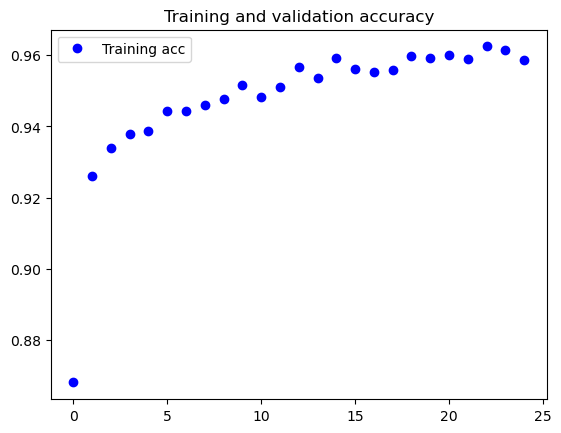

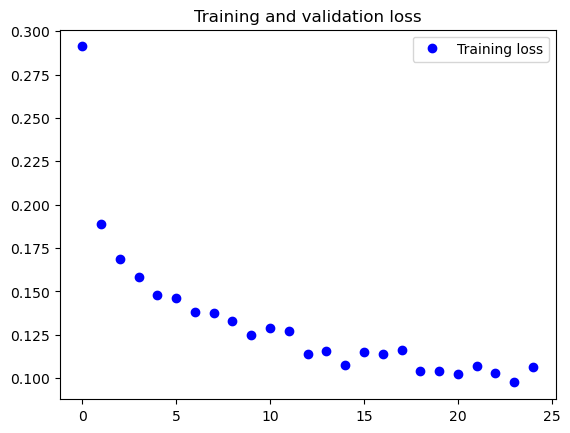

In [21]:
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
#plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Classification sur le set test

In [35]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(64, 64),
        batch_size=1,
        class_mode='binary',
        shuffle=False)

test_loss, test_acc = model.evaluate(test_generator)
print('Accuracy score du jeu de données test : {:.2f}%'.format(test_acc*100))

Found 624 images belonging to 2 classes.
624/624 [==============================] - 16s 26ms/step - loss: 0.3476 - accuracy: 0.8798
Accuracy score du jeu de données test : 87.98%


## Visualisation de la matrice de confusion 

In [36]:
y_pred = model.predict(test_generator)
y_pred_classes = np.round(y_pred).astype(int)
y_pred_classes = y_pred_classes.ravel().tolist()
y_true = test_generator.classes

624/624 [==============================] - 19s 30ms/step


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

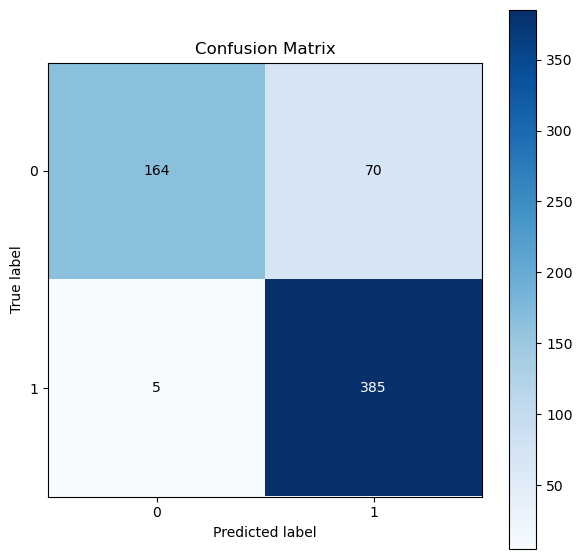

In [37]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_true, y_pred_classes, figsize=(7,7))

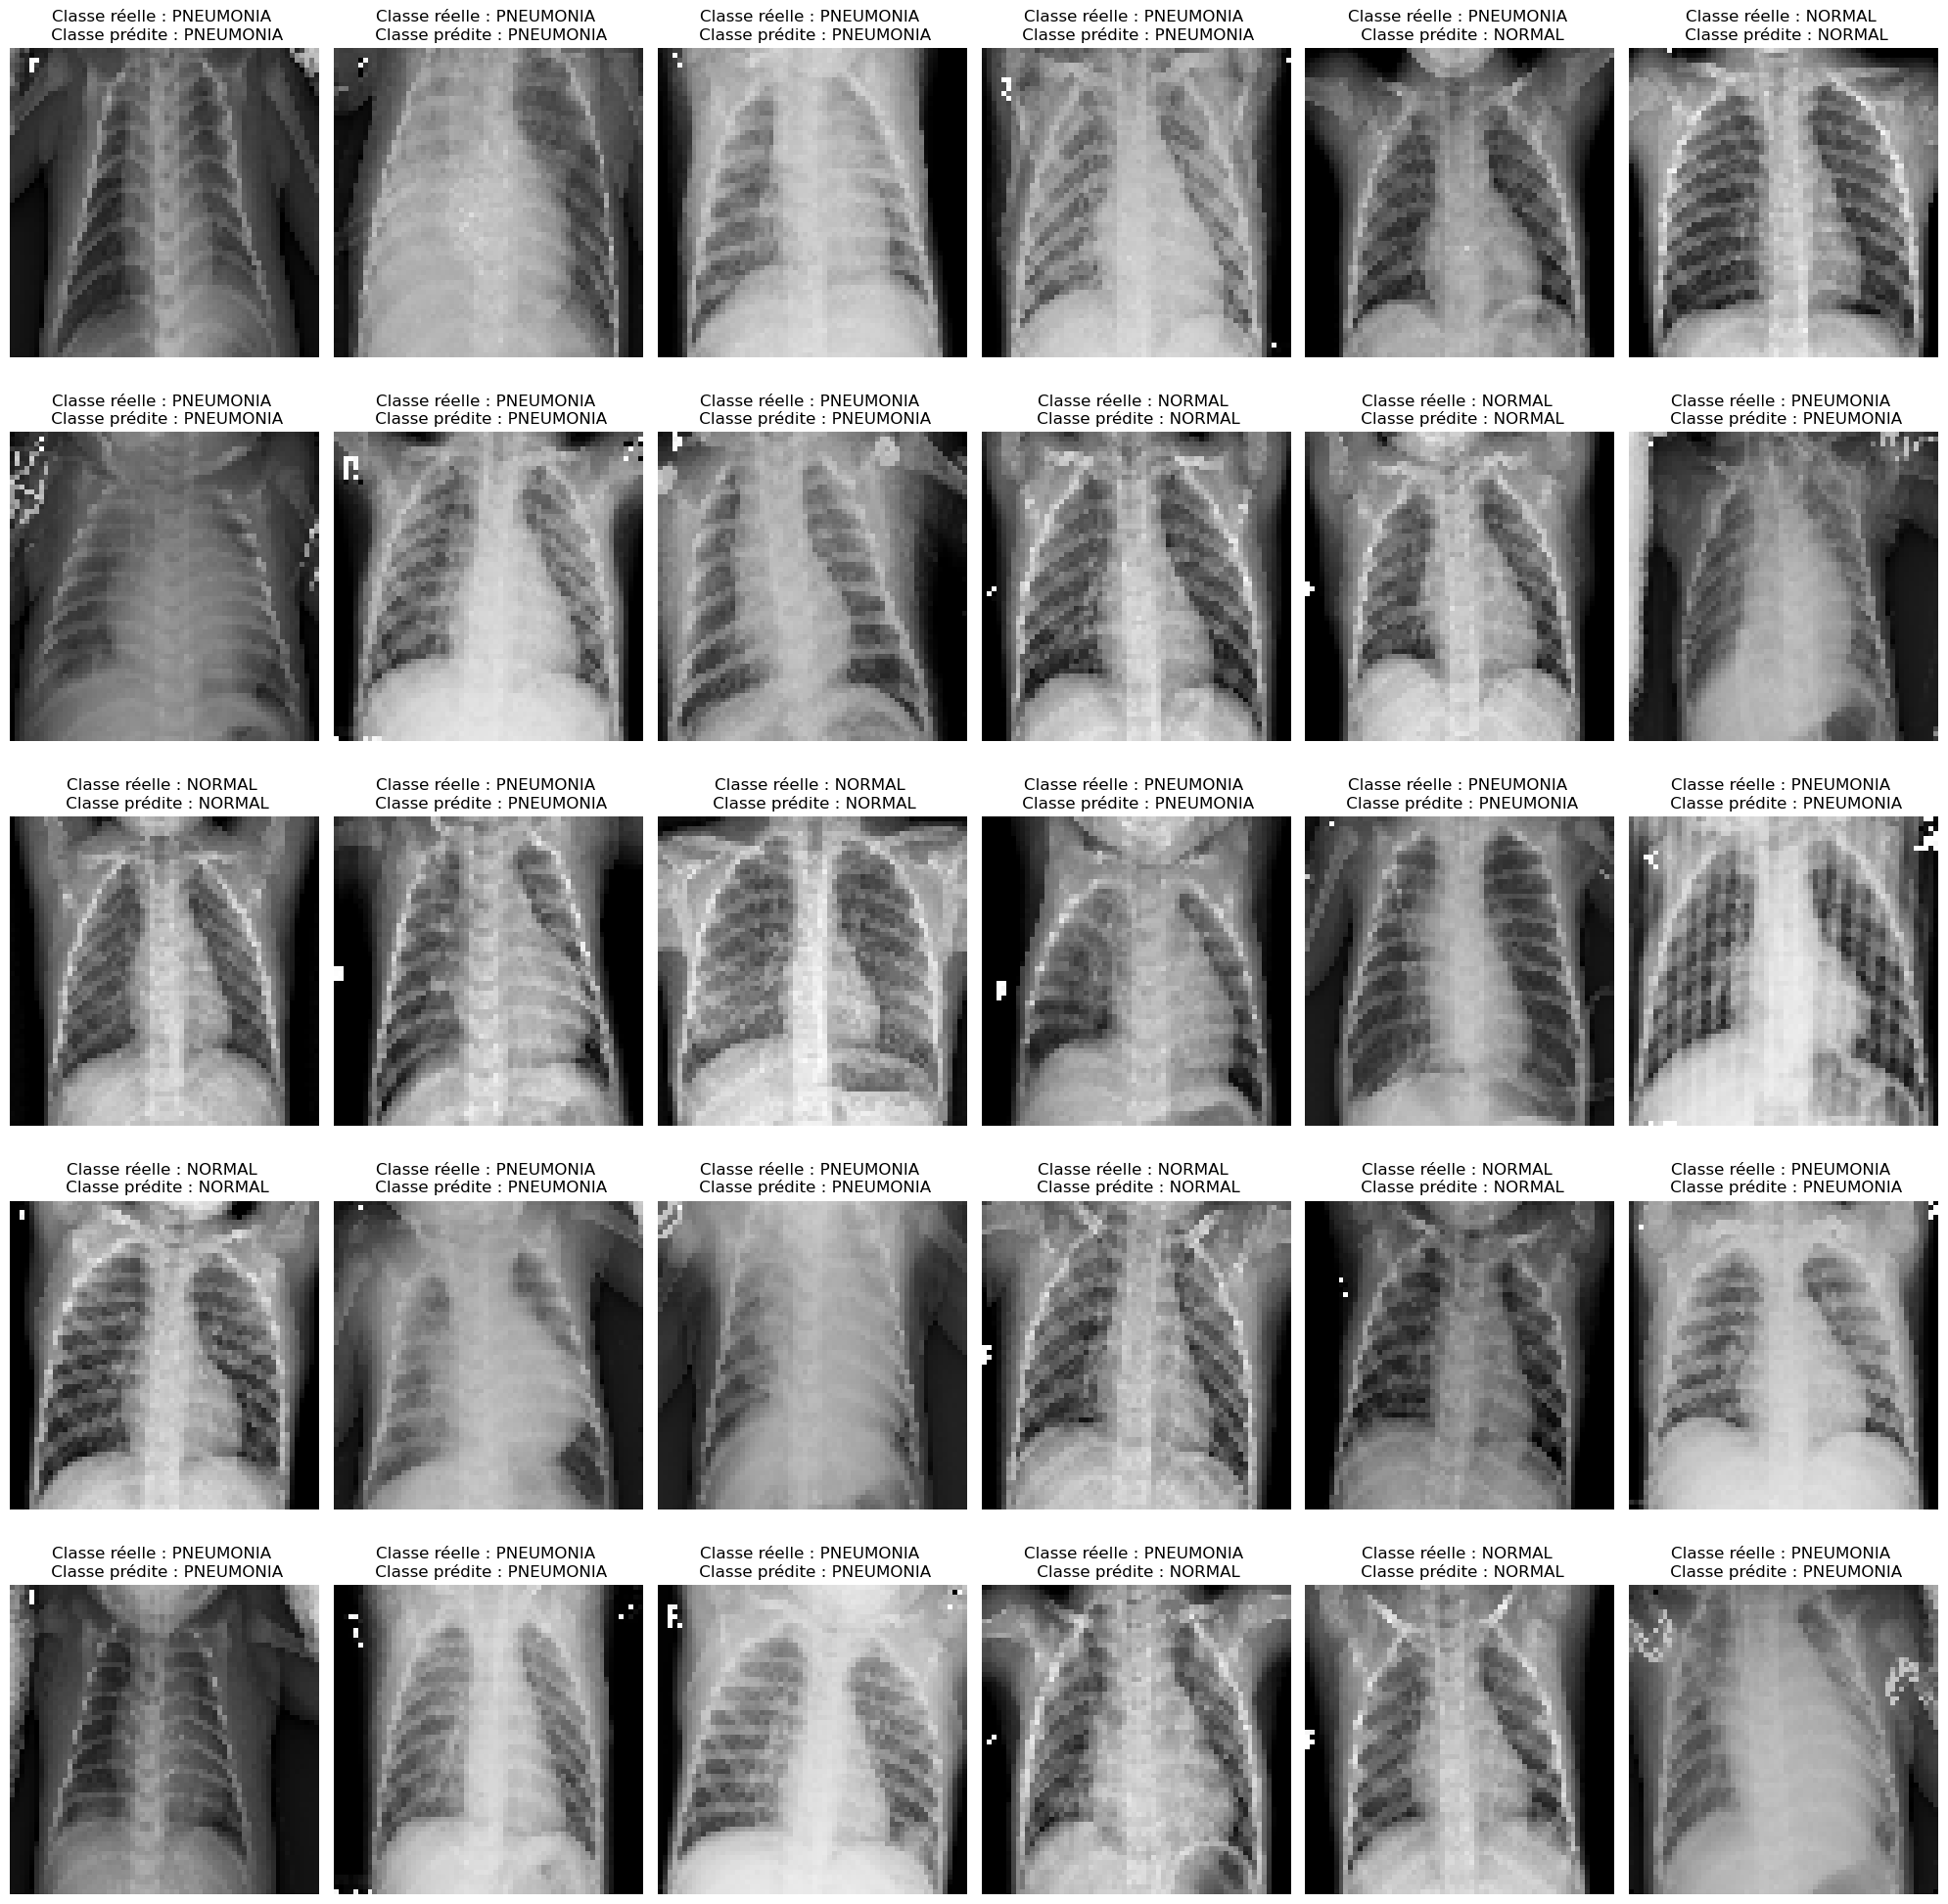

In [39]:
import random

class_names = list(test_generator.class_indices.keys())

num_images = 30
num_cols = 6  
num_rows = num_images // num_cols + (num_images % num_cols > 0)  

random_image_indices = random.sample(range(624), num_images)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 20))

for i in range(num_images):
    row = i // num_cols
    col = i % num_cols
    img, _ = test_generator[random_image_indices[i]]
    true_class = class_names[y_true[random_image_indices[i]]]
    pred_class = class_names[y_pred_classes[random_image_indices[i]]]
    axs[row, col].imshow(img[0])
    axs[row, col].set_title(f"Classe réelle : {true_class} \n Classe prédite : {pred_class}")
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()